In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


ทดลองค่าเฉลี่ยดูก่อน

In [3]:
drinks.beer_servings.mean()

106.16062176165804

หาค่าเฉลี่ยนของ beer_servings โดยจัดกลุ่มตามทวีป

In [4]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

หาค่าเฉลี่ยนของ beer_servings โดยเลือกเฉพาะทวีป Asia

In [5]:
drinks[drinks.continent == 'Asia'].beer_servings.mean()

37.045454545454547

เลือกใช้ aggrigate method อื่นๆดูบ้าง

In [6]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [7]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

เราสามารถใช้ agg method เพื่อทำทีละหลาย aggrigate method ได้พร้อมกันดังนี้

In [8]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


ถ้าเราใช้ aggrigate method โดยไม่ระบุคอลัมน์ pandas จะทำการนำคอลัมน์ที่มีชนิดข้อมูลชนิดตัวเลขมาคำนวณทั้งหมด

In [9]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


ลองนำผลที่ได้มาจัดทำกราฟง่ายๆด้วย matplotlib

In [10]:
%matplotlib inline

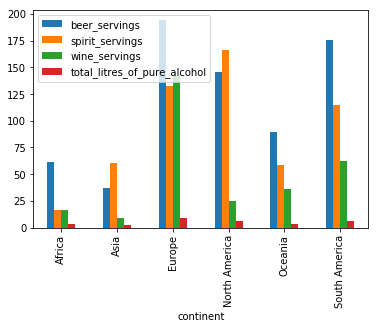

In [11]:
drinks.groupby('continent').mean().plot(kind='bar')

ลองใช้ agg method ร่วมกับ groupby โดยไม่ระบุคอลัมน์

In [12]:
drinks.groupby('continent').agg(['count', 'min', 'max', 'mean'])

beer_servings                      spirit_servings           \
                      count min  max        mean           count min  max   
continent                                                                   
Africa                   53   0  376   61.471698              53   0  152   
Asia                     44   0  247   37.045455              44   0  326   
Europe                   45   0  361  193.777778              45   0  373   
North America            23   1  285  145.434783              23  68  438   
Oceania                  16   0  306   89.687500              16   0  254   
South America            12  93  333  175.083333              12  25  302   

                          wine_servings                       \
                     mean         count min  max        mean   
continent                                                      
Africa          16.339623            53   0  233   16.264151   
Asia            60.840909            44   0  123    9.068182   
Europe         132.555556            45   0  370  142.222222   
North America  165.739130            23   1  100   24.521739   
Oceania         58.437500            16   0  212   35.625000   
South America  114.750000            12   1  221   62.416667   

              total_litres_of_pure_alcohol                       
                                     count  min   max      mean  
continent                                                        
Africa                                  53  0.0   9.1  3.007547  
Asia                                    44  0.0  11.5  2.170455  
Europe                                  45  0.0  14.4  8.617778  
North America                           23  2.2  11.9  5.995652  
Oceania                                 16  0.0  10.4  3.381250  
South America                           12  3.8   8.3  6.308333

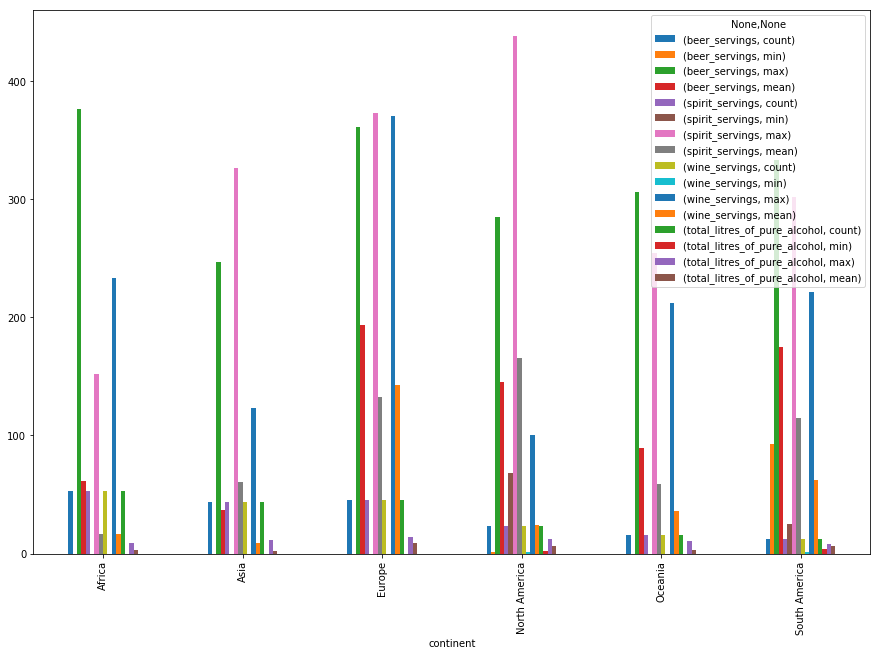

In [13]:
drinks.groupby('continent').agg(['count', 'min', 'max', 'mean']).plot(kind='bar', figsize=(15,10))